In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt
import sys
import yaml

PATH_TO_CONFIG = "D:\home\sergey\infinite_album\guitar_synth\ddsp_simplified\ddsp_simplified\configs\Supervised_Red_Guitar.yaml"

sys.path.append("D:\home\sergey\infinite_album\guitar_synth\ddsp_simplified\ddsp_simplified")

%load_ext autoreload
%autoreload 2

In [12]:
    with open(PATH_TO_CONFIG, 'r') as file:
        config = dict(yaml.load(file, Loader=yaml.FullLoader))
        
    config

{'run_name': 'NoLatent_Reverb',
 'wandb': {'project_name': 'Red_Guitar'},
 'data': {'instrument': 'Violin',
  'path': 'D:\\home\\sergey\\infinite_album\\guitar_synth\\ddsp_simplified\\ddsp_simplified\\audio_clips\\Red_Guitar',
  'preprocessing_time': 250,
  'sample_rate': 16000,
  'frame_rate': 250,
  'confidence_threshold': 0.0,
  'normalize': False,
  'midi_features': ['cc_55', 'distance_from_onset']},
 'model': {'type': 'Supervised',
  'decoder_time': 1000,
  'encoder': False,
  'reverb': True,
  'path': None,
  'dir': None},
 'loss': {'type': 'spectral', 'logmag_weight': 1.0},
 'optimizer': {'name': 'Adam',
  'decay_rate': 0.98,
  'decay_steps': 10000,
  'lr': 0.0001},
 'training': {'batch_size': 32, 'epochs': 2000}}

In [17]:
from utilities import load_track, get_raw_midi_features_from_file

In [14]:
audio_data = load_track(config['data']['path'] + "\\red_guitar.mp3")

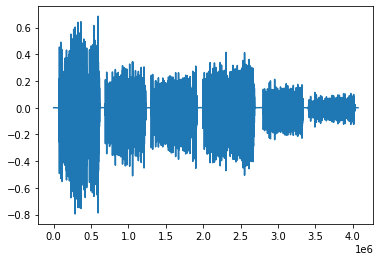

In [16]:
plt.plot(audio_data)

In [20]:
raw_midi_data = get_raw_midi_features_from_file(path_to_midi_file=config['data']['path'] + "\\red_guitar.MID",
                                               frame_rate=config['data']['frame_rate'],
                                               audio_length_seconds=audio_data.shape[0] / config['data']['sample_rate']
                                               )

In [28]:
raw_midi_data['cc_55'].shape, audio_data.shape[0]/16000 * 250

((63600,), 63600.0)

In [50]:
VISUALISATION_START_TIME = 10
VISUALISATION_END_TIME = 15
sample_rate = config['data']['sample_rate']
frame_rate = config['data']['frame_rate']

length_of_example_seconds = 4.0

In [54]:
from utilities import frame_generator, generate_midi_features_examples
generated_audio_frames = frame_generator(audio_data, int(length_of_example_seconds * sample_rate))
generated_midi_feature_examples = generate_midi_features_examples(raw_midi_data, int(length_of_example_seconds * frame_rate))

In [60]:
EXAMPLE_ID_FOR_VISUALISATION = 5

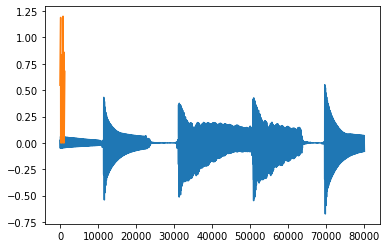

In [40]:
plt.plot(audio_data[VISUALISATION_START_TIME * sample_rate :VISUALISATION_END_TIME * sample_rate])
plt.plot(raw_midi_data['distance_from_onset'][VISUALISATION_START_TIME * frame_rate :VISUALISATION_END_TIME * frame_rate])

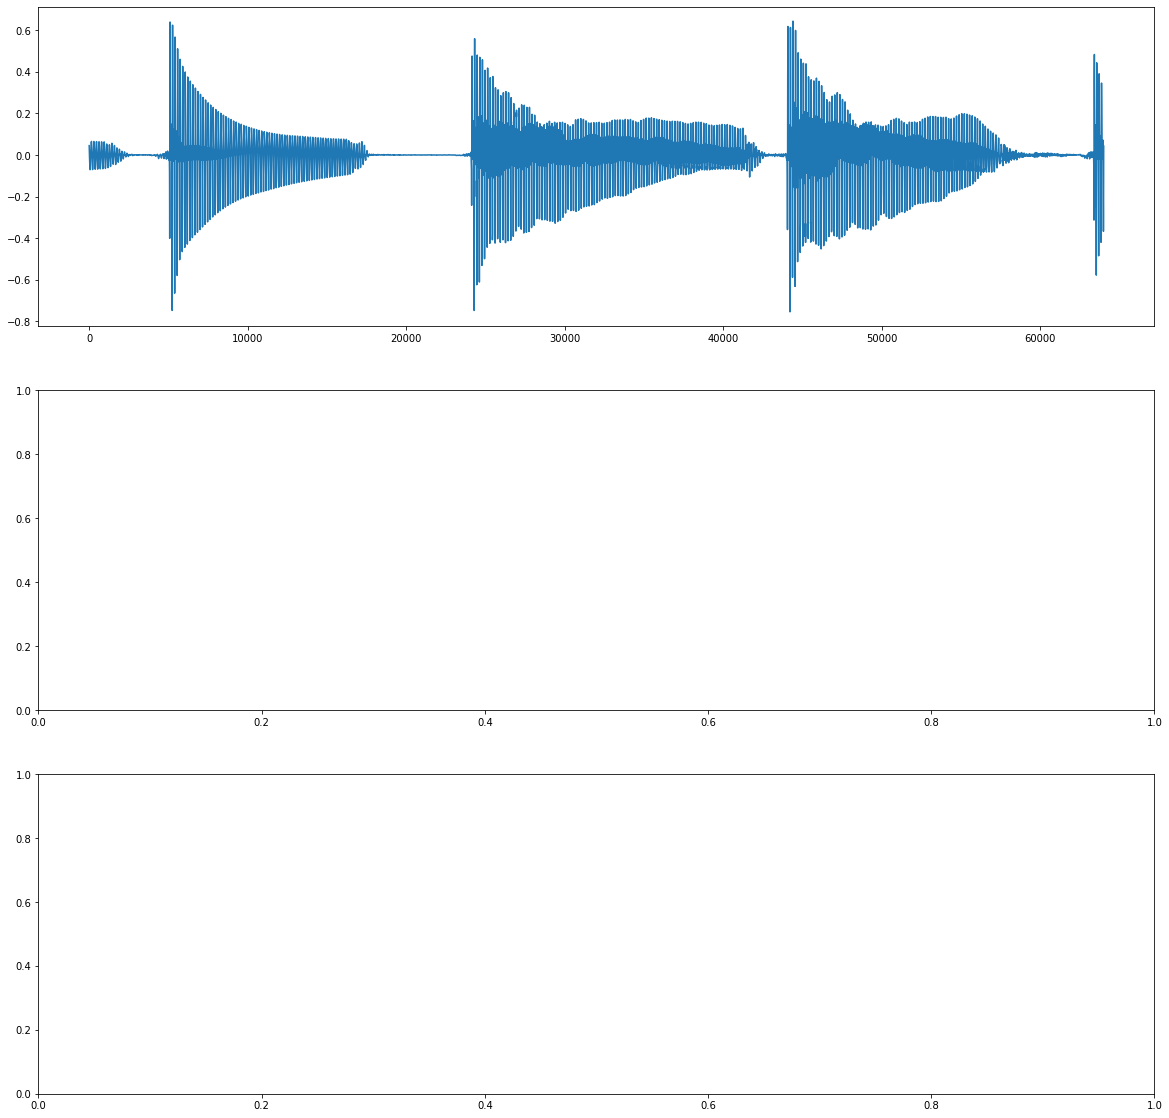

In [61]:
plt.figure(figsize=(20,20))

waveform_plot = plt.subplot2grid((3, 1), (0, 0))
f0_plot = plt.subplot2grid((3, 1), (1, 0))
loudness_plot = plt.subplot2grid((3, 1), (2, 0))

waveform_plot.plot(generated_audio_frames[EXAMPLE_IDX_FOR_VISUALISATION])
f0_plot.plo()


In [82]:
from dataloader import  make_supervised_dataset as make_supervised_dataset_from_dataloader

In [83]:
train_ds, val_ds, _, train_frames, val_frames = make_supervised_dataset_from_dataloader(config['data']['path'],
                                mfcc=config['model']['encoder'],
                                mfcc_nfft=1024,
                                batch_size=config['training']['batch_size'],
                                sample_rate=config['data']['sample_rate'],
                                normalize=config['data']['normalize'],
                                conf_threshold=config['data']['confidence_threshold'],
                                frame_rate=config['data'].get('frame_rate', 250),
                                midi_feature_names=config['data'].get('midi_features', None))

Train set size: 47
Val set size: 16


D:\home\sergey\infinite_album\guitar_synth\ddsp_simplified\venv37\lib\site-packages\librosa\core\convert.py:1354: RuntimeWarning: divide by zero encountered in log10
  - 0.5 * np.log10(f_sq + const[3])


In [86]:
train_frames.keys()

dict_keys(['audio', 'f0_hz', 'loudness_db', 'cc_55', 'distance_from_onset'])

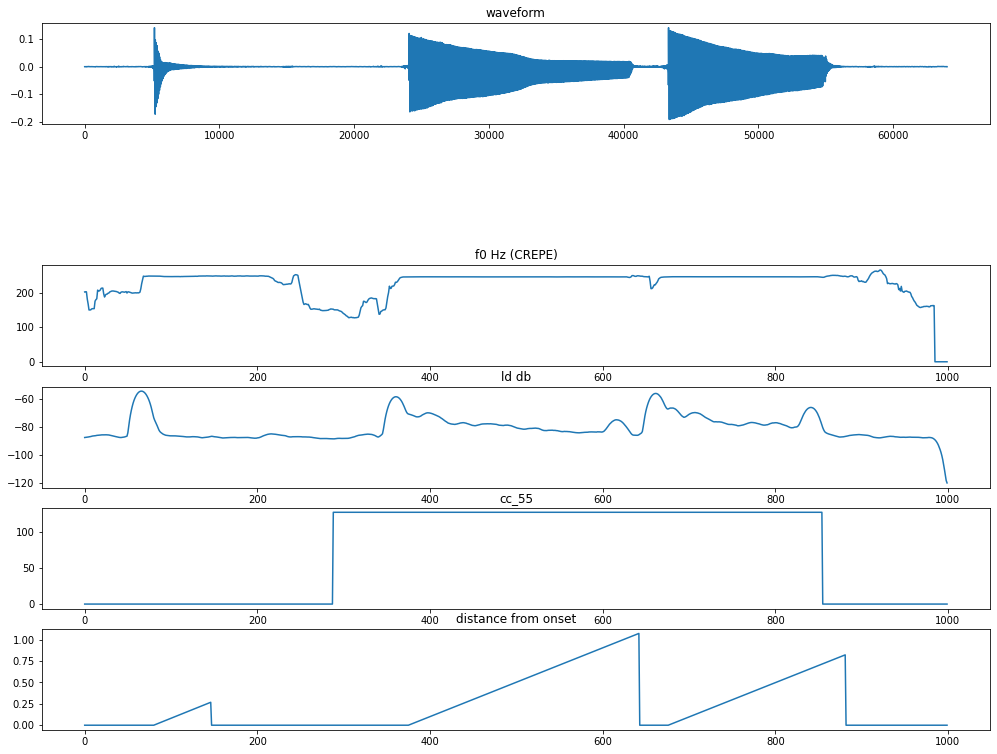

In [115]:
plt.figure(figsize=(17,13))

num_plots = 6

waveform_plot = plt.subplot2grid((num_plots, 1), (0, 0))
waveform_plot.set_title('waveform')

f0_plot = plt.subplot2grid((num_plots, 1), (2, 0))
f0_plot.set_title('f0 Hz (CREPE)')

loudness_plot = plt.subplot2grid((num_plots, 1), (3, 0))
loudness_plot.set_title('ld db')

cc_55_plot = plt.subplot2grid((num_plots,1), (4,0))
cc_55_plot.set_title('cc_55')


distance_from_onset_plot = plt.subplot2grid((num_plots,1), (5,0))
distance_from_onset_plot.set_title('distance from onset')

waveform_plot.plot(train_frames['audio'][EXAMPLE_IDX_FOR_VISUALISATION])
f0_plot.plot(train_frames['f0_hz'][EXAMPLE_IDX_FOR_VISUALISATION])
loudness_plot.plot(train_frames['loudness_db'][EXAMPLE_IDX_FOR_VISUALISATION])
cc_55_plot.plot(train_frames['cc_55'][EXAMPLE_IDX_FOR_VISUALISATION])
distance_from_onset_plot.plot(train_frames['distance_from_onset'][EXAMPLE_IDX_FOR_VISUALISATION])